<a href="https://colab.research.google.com/github/rkukjk/ISRO-mission-analysis/blob/main/ISROMissionsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()


Saving isro.csv to isro.csv


In [4]:
mainDf = pd.read_csv("isro.csv")

In [5]:
mainDf

,Name,Launch Date,Launcher Type,Payload,Orbit Type,Application,Outcome
0,GSLV-F10 / EOS-03,"Aug 12, 2021",GSLV,EOS-03,GTO,Earth Observation,Launch unsuccessful
1,PSLV-C51/Amazonia-1,"Feb 28, 2021",PSLV-DL,NaN,NaN,Student Satellite,Successful
2,PSLV-C51/Amazonia-1,"Feb 28, 2021",PSLV-DL,NaN,NaN,Student Satellite,Successful
3,PSLV-C50/CMS-01,"Dec 17, 2020",PSLV-XL,CMS-01,GSO,Communication,Successful
4,PSLV-C49/EOS-01,"Nov 07, 2020",PSLV-DL,EOS-01,LEO,"Disaster Management System, Earth Observation",Successful
...,...,...,...,...,...,...,...
85,ASLV-D1,"Mar 24, 1987",NaN,SROSS-1,NaN,Experimental,Launch Unsuccessful
86,SLV-3,"Apr 17, 1983",NaN,Rohini Satellite RS-D2,LEO,Earth Observation,Successful
87,SLV-3D1,"May 31, 1981",NaN,Rohini Satellite RS-D1,LEO,Earth Observation,Successful
88,SLV-3E2,"Jul 18, 1980",NaN,Rohini Satellite RS-1,NaN,NaN,Successful


In [7]:
unsuccessDf = mainDf[mainDf['Outcome'] == "Launch Unsuccessful"]

In [8]:
unsuccessDf

,Name,Launch Date,Launcher Type,Payload,Orbit Type,Application,Outcome
20,PSLV-C39/IRNSS-1H Mission,"Aug 31, 2017",PSLV-XL,IRNSS-1H,NaN,Navigation,Launch Unsuccessful
56,GSLV-F06 / GSAT-5P,"Dec 25, 2010",GSLV-MK-II,GSAT-5P,GSO,Communication,Launch Unsuccessful
59,GSLV-D3 / GSAT-4,"Apr 15, 2010",GSLV-MK-II,GSAT-4,GSO,Communication,Launch Unsuccessful
69,GSLV-F02 / INSAT-4C,"Jul 10, 2006",GSLV-MK-II,INSAT-4C,GSO,Communication,Launch Unsuccessful
82,PSLV-D1,"Sep 20, 1993",PSLV-G,NaN,LEO,Earth Observation,Launch Unsuccessful
84,ASLV-D2,"Jul 13, 1988",NaN,SROSS-2,NaN,"Earth Observation, Experimental",Launch Unsuccessful
85,ASLV-D1,"Mar 24, 1987",NaN,SROSS-1,NaN,Experimental,Launch Unsuccessful
89,SLV-3E1,"Aug 10, 1979",NaN,Rohini Technology Payload (RTP),NaN,NaN,Launch Unsuccessful


In [10]:
mainDf.Outcome.unique()

array(['Launch unsuccessful', 'Successful', 'Launch Unsuccessful'],
      dtype=object)

In [18]:
unsuccessDf = mainDf.loc[(mainDf['Outcome'] == 'Launch unsuccessful') | (mainDf['Outcome'] == 'Launch Unsuccessful')]

In [19]:
unsuccessDf

,Name,Launch Date,Launcher Type,Payload,Orbit Type,Application,Outcome
0,GSLV-F10 / EOS-03,"Aug 12, 2021",GSLV,EOS-03,GTO,Earth Observation,Launch unsuccessful
20,PSLV-C39/IRNSS-1H Mission,"Aug 31, 2017",PSLV-XL,IRNSS-1H,NaN,Navigation,Launch Unsuccessful
56,GSLV-F06 / GSAT-5P,"Dec 25, 2010",GSLV-MK-II,GSAT-5P,GSO,Communication,Launch Unsuccessful
59,GSLV-D3 / GSAT-4,"Apr 15, 2010",GSLV-MK-II,GSAT-4,GSO,Communication,Launch Unsuccessful
69,GSLV-F02 / INSAT-4C,"Jul 10, 2006",GSLV-MK-II,INSAT-4C,GSO,Communication,Launch Unsuccessful
82,PSLV-D1,"Sep 20, 1993",PSLV-G,NaN,LEO,Earth Observation,Launch Unsuccessful
84,ASLV-D2,"Jul 13, 1988",NaN,SROSS-2,NaN,"Earth Observation, Experimental",Launch Unsuccessful
85,ASLV-D1,"Mar 24, 1987",NaN,SROSS-1,NaN,Experimental,Launch Unsuccessful
89,SLV-3E1,"Aug 10, 1979",NaN,Rohini Technology Payload (RTP),NaN,NaN,Launch Unsuccessful


Let's visualize the unsucessful launches based on Launcher Type

In [23]:
import seaborn as sns

In [33]:
percentage = unsuccessDf['Launcher Type'].value_counts(normalize = True)

In [34]:
percentage

GSLV-MK-II    0.500000
GSLV          0.166667
PSLV-XL       0.166667
PSLV-G        0.166667
Name: Launcher Type, dtype: float64

In [38]:
launcherTypeDict = dict(percentage)

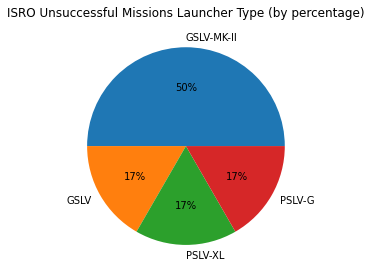

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


labels = []
percentages = []


for x,y in launcherTypeDict.items():
  labels.append(x)
  percentages.append(y)

plt.pie(percentages, labels=labels, autopct='%1.0f%%')
plt.axis('equal')
plt.title('ISRO Unsuccessful Missions Launcher Type (by percentage)\n')
plt.show()

This pie chart shows that 50% of the unsuccessful launches have a launcher type of GSLV-MK-II (worth investigating) 

,Name,Launch Date,Launcher Type,Payload,Orbit Type,Application,Outcome
0,GSLV-F10 / EOS-03,"Aug 12, 2021",GSLV,EOS-03,GTO,Earth Observation,Launch unsuccessful
1,PSLV-C51/Amazonia-1,"Feb 28, 2021",PSLV-DL,NaN,NaN,Student Satellite,Successful
2,PSLV-C51/Amazonia-1,"Feb 28, 2021",PSLV-DL,NaN,NaN,Student Satellite,Successful
3,PSLV-C50/CMS-01,"Dec 17, 2020",PSLV-XL,CMS-01,GSO,Communication,Successful
4,PSLV-C49/EOS-01,"Nov 07, 2020",PSLV-DL,EOS-01,LEO,"Disaster Management System, Earth Observation",Successful
...,...,...,...,...,...,...,...
85,ASLV-D1,"Mar 24, 1987",NaN,SROSS-1,NaN,Experimental,Launch Unsuccessful
86,SLV-3,"Apr 17, 1983",NaN,Rohini Satellite RS-D2,LEO,Earth Observation,Successful
87,SLV-3D1,"May 31, 1981",NaN,Rohini Satellite RS-D1,LEO,Earth Observation,Successful
88,SLV-3E2,"Jul 18, 1980",NaN,Rohini Satellite RS-1,NaN,NaN,Successful
